In [ ]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS



In [ ]:
tweets_df = pd.read_csv("../content/blockchain_tweets.csv")

In [ ]:
print(f"data shape: {tweets_df.shape}")


data shape: (10000, 13)


In [ ]:
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         10000 non-null  object
 1   user_location     3633 non-null   object
 2   user_description  8596 non-null   object
 3   user_created      10000 non-null  object
 4   user_followers    10000 non-null  int64 
 5   user_friends      10000 non-null  int64 
 6   user_favourites   10000 non-null  int64 
 7   user_verified     10000 non-null  bool  
 8   date              10000 non-null  object
 9   text              10000 non-null  object
 10  hashtags          6073 non-null   object
 11  source            10000 non-null  object
 12  is_retweet        10000 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 879.0+ KB


In [ ]:
tweets_df.describe()


,user_followers,user_friends,user_favourites
count,1.000000e+04,10000.00000,10000.000000
mean,3.084688e+03,1456.17030,3834.572600
std,4.769006e+04,6460.67404,11971.127161
min,0.000000e+00,0.00000,0.000000
25%,3.900000e+01,34.00000,52.000000
50%,3.015000e+02,319.00000,515.500000
75%,1.036250e+03,1375.25000,2382.250000
max,3.215958e+06,379452.00000,213322.000000


In [ ]:
tweets_df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25 19:11:34+00:00,237,331,2,False,2021-11-14 20:02:49+00:00,#blockchain Y I N C. C O M is hiring for the f...,['blockchain'],blockwork_ai,False
1,Rib-It,NaN,🐸 RibIt 2021 YOU are the foundation of our cre...,2021-09-19 22:05:58+00:00,1819,2221,266,False,2021-11-14 20:02:30+00:00,Check out this account on OpenSea https://t.co...,"['nfts', 'nft', 'nftart', 'nftartist', 'nftcol...",Twitter Web App,False
2,❤️LacedWhales (CARDANO POOL: PEACE),NaN,1M+ $ADA whale txs laced with ❤️ from La @Reps...,2020-08-21 11:38:22+00:00,617,3,52,False,2021-11-14 20:02:24+00:00,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...,['Cardano'],laced-whales-dev,False
3,Wiscobus Ntukuyoh,Lagos,"Crypto Analyst |Crypto ambassador |$FIL,$DASH|...",2018-04-25 23:23:16+00:00,1114,4616,422,False,2021-11-14 20:02:20+00:00,🌈 Hop over to #Coinstore's App to trade now!!\...,"['Coinstore', 'CHZ', 'USDT', 'DENT', 'USDT', '...",Twitter for Android,False
4,Rib-It,NaN,🐸 RibIt 2021 YOU are the foundation of our cre...,2021-09-19 22:05:58+00:00,1819,2221,266,False,2021-11-14 20:02:18+00:00,Check out this account on OpenSea https://t.co...,"['nfts', 'nft', 'nftart', 'nftartist', 'nftcol...",Twitter Web App,False


In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,0,6367,1404,0,0,0,0,0,0,0,3927,0,0
Percent,0.0,63.67,14.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.27,0.0,0.0
Types,object,object,object,object,int64,int64,int64,bool,object,object,object,object,bool


In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,10000,3633,8596,10000,10000,10000,10000,10000,10000,10000,6073,10000,10000
Uniques,4997,1226,3884,5052,1803,2203,2770,2,9177,9697,2333,152,1


In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,10000,3633,8596,10000,10000,10000,10000,10000,10000,10000,6073,10000,10000
Most frequent item,❤️LacedWhales (CARDANO POOL: PEACE),"Dhaka, Bangladesh",1M+ $ADA whale txs laced with ❤️ from La @Reps...,2020-08-21 11:38:22+00:00,617,3,52,False,2021-11-14 18:30:00+00:00,@swisscpayment Hopefully this project is a suc...,['Cardano'],Twitter for Android,False
Frequence,1340,170,1340,1340,1344,1358,1348,9974,5,17,1343,3265,10000
Percent from total,13.4,4.679,15.589,13.4,13.44,13.58,13.48,99.74,0.05,0.17,22.114,32.65,100.0


In [ ]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

ValueError: ignored

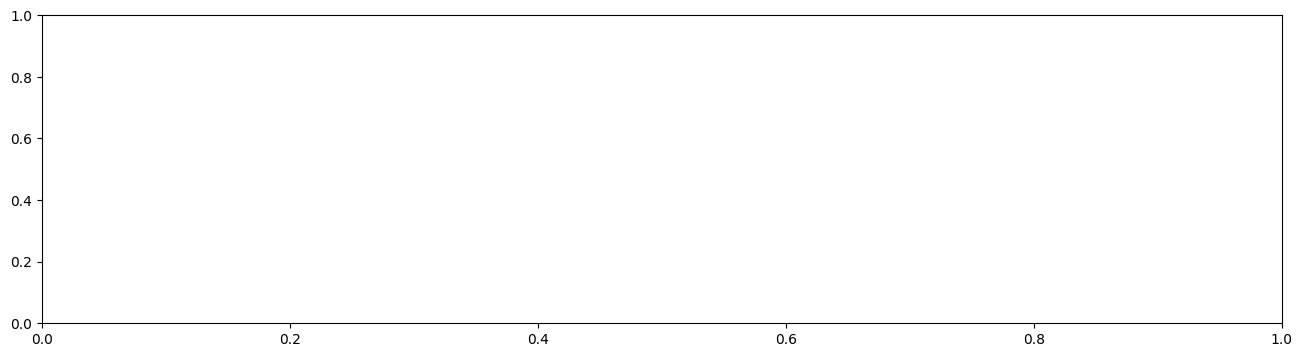

In [ ]:
plot_count("user_name", "User name", tweets_df,4)

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

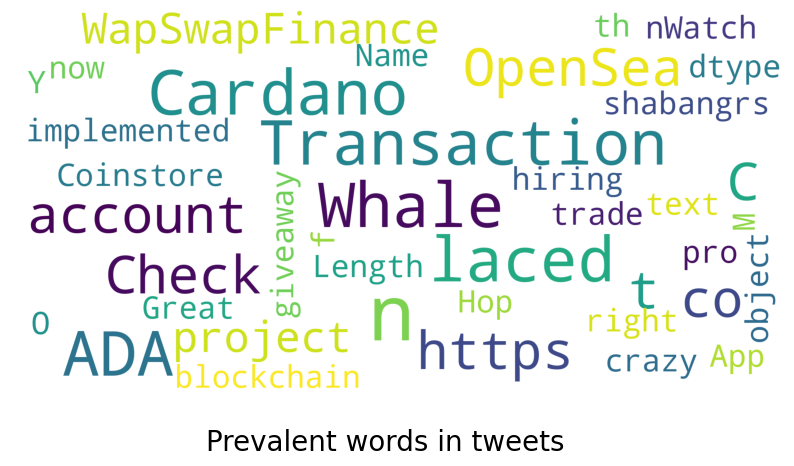

In [ ]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

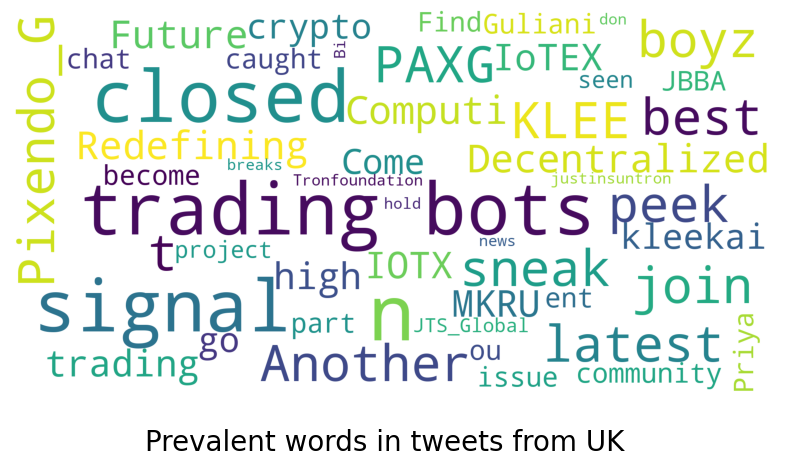

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

In [ ]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

<ipython-input-27-7a81b2f1d9b1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)


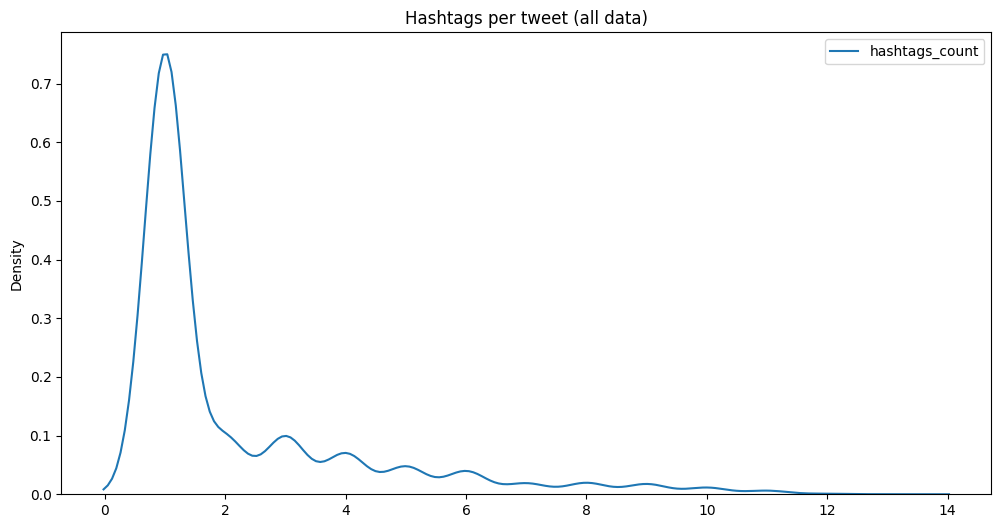

In [ ]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)